In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
#Set up font properties for plots

from matplotlib import rc, font_manager
fontProperties = {'family':'sans-serif','sans-serif':['Arial'],
    'weight' : 'normal', 'size' : 15}
ticks_font = font_manager.FontProperties(family='Arial', style='normal',
    size=20, weight='normal', stretch='normal')
plt.rc('font',**fontProperties)

In [19]:
#Import data

df_R0 = pd.read_excel('Memory conformity Raw data.xlsx', sheet_name='Features', index_col="Participants")
df_R0['Average CI'] = (df_R0['CI 1']+df_R0['CI 2']+df_R0['CI 3'])/3
df_R0

,Target mean,Lure mean,Target variance,Lure variance,Target maximum,Lure maximum,Target minimum,Lure minimum,Target median,Lure median,CI 1,CI 2,CI 3,Average CI
Participants,,,,,,,,,,,,,,
1,1.311111,-4.800000,274.792099,410.248889,45,43,-30,-80,3,-8,0.504162,0.590517,1.104743,0.733141
2,41.333333,-51.088889,4281.155556,3264.480988,100,100,-100,-100,56,-61,-0.163153,0.273866,-0.219285,-0.036191
3,3.044444,4.733333,336.709136,260.062222,39,32,-41,-28,10,9,1.421254,0.152008,0.612990,0.728751
4,47.666667,31.511111,5555.733333,5137.894321,100,100,-100,-100,100,30,0.349272,0.219105,0.443742,0.337373
5,43.000000,-78.444444,4373.777778,2577.580247,100,100,-100,-100,80,-100,0.000000,0.020053,0.164704,0.061586
6,-5.088889,-6.222222,498.258765,443.861728,35,35,-57,-41,-14,-13,1.346244,0.911097,0.470879,0.909406
7,23.222222,-53.244444,5154.039506,3114.806914,100,85,-100,-100,38,-78,0.228922,-0.134304,-0.031311,0.021102
8,-2.555556,-68.066667,7832.469136,4018.728889,100,100,-100,-100,0,-100,0.319028,0.002525,0.006077,0.109210
9,38.800000,-35.644444,5309.626667,4717.295802,100,100,-100,-100,85,-60,0.006421,0.061869,0.283373,0.117221


Text(0, 0.5, 'S.S.E.')

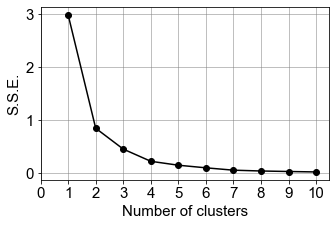

In [20]:
#Figure 4A inset

from sklearn.cluster import KMeans

#Evaluate sum of squared error (sse) for different numbers of K-means clusters
sse = []
list_k = list(range(1, 11))
sub = pd.DataFrame(df_R0, columns=['Average CI'])

for k in list_k:
    kmeans = KMeans(n_clusters = k).fit(sub) 
    #y_kmeans = kmeans.predict(sub)
    sse.append(kmeans.inertia_)

#Generate plot    
fig = plt.figure(figsize=(2,3))
ax = fig.add_axes([10,4,2,0.8])
ax.plot(list_k, sse, '-o', c='black')

#Edit plot
ax.patch.set_facecolor('white')
ax.grid(linestyle='-', linewidth='0.5', color='gray')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0,1,2,3])
plt.xlabel('Number of clusters')
plt.ylabel('S.S.E.')

[1 0 1 2 0 1 0 0 0 2 1 2 2 2 0 2 0 2 2 0 3 1 0 0 0 0 1 0 0 3 0 0 2 0 0 0 1
 0]
explained variance ratio (first two components): [0.60597293 0.30633717]


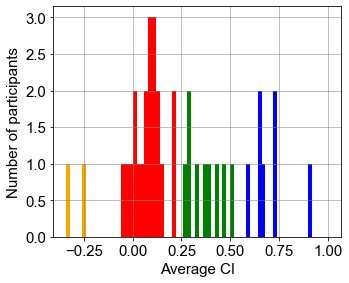

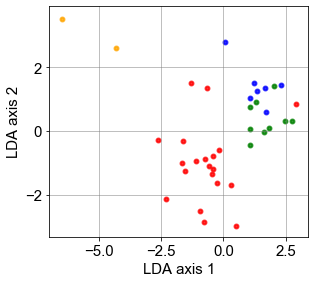

In [23]:
#Figure 4A and B

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#K-means clustering
cluster = 4   #obtained from plot above
legend = list(np.arange(0,4))
sub = pd.DataFrame(df_R0, columns=['Average CI'])
kmeans = KMeans(n_clusters = cluster).fit(sub)
klabels = kmeans.labels_
print(klabels)

#Group data by K-means clusters
Gp0 = list()
Gp1 = list()
Gp2 = list()
Gp3 = list()
for i in range (38):
    if klabels[i] == 0:
        Gp0.append(df_R0['Average CI'].values[i])
    if klabels[i] == 1:
        Gp1.append(df_R0['Average CI'].values[i]) 
    if klabels[i] == 2:
        Gp2.append(df_R0['Average CI'].values[i])
    if klabels[i] == 3:
        Gp3.append(df_R0['Average CI'].values[i])
        
#Generate histogram plot        
fig = plt.figure(figsize=(2,4))
ax = fig.add_axes([10,4,2,0.8])
bins=[-0.34, -0.32, -0.3, -0.28, -0.26, -0.24, -0.22, -0.2, -0.18, -0.16, -0.14, -0.12, -0.1, -0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
ax.hist(Gp0, bins=bins, color = 'red')
ax.hist(Gp1, bins=bins, color = 'blue')
ax.hist(Gp2, bins=bins, color = 'green')
ax.hist(Gp3, bins=bins, color = 'orange')
plt.xlabel('Average CI')
plt.ylabel('Number of participants')
ax.set_facecolor('white')
ax.grid(linestyle='-', linewidth='0.5', color='gray')

#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
feat = pd.DataFrame(df_R0, columns=['Target mean','Lure mean','Target variance','Lure variance','Target maximum','Lure maximum','Target minimum','Lure minimum','Target median','Lure median'])
X = lda.fit(feat, klabels).transform(feat)

# Percentage of variance explained by each component
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

#Generate LDA plot
fig = plt.figure(figsize=(1.8,4))
ax = fig.add_axes([10,4,2,0.8])
colors = ['red','blue','green','orange']

for color, i in zip(colors, legend):
    ax.scatter(X[klabels == i, 0], X[klabels == i, 1], s=15, color=color, alpha=.8, lw=2, label=i)

plt.xlabel('LDA axis 1')
plt.ylabel('LDA axis 2')
ax.set_facecolor('white')
ax.grid(linestyle='-', linewidth='0.5', color='gray')
